In [0]:
import tensorflow
from tensorflow import keras

In [0]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

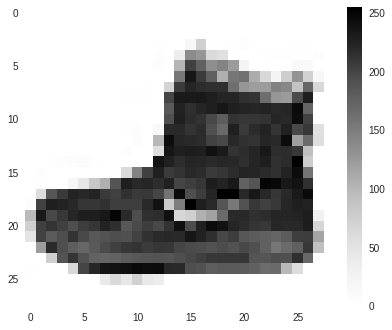

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
y_train[0]

9

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
class_names[y_train[0]]

'Ankle boot'

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
y_train.shape

(60000, 10)

(60000, 28, 28, 1)

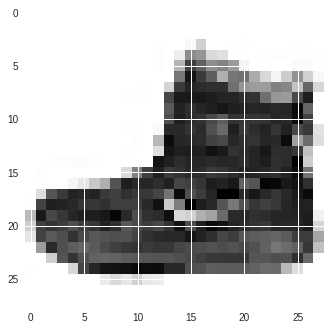

In [0]:
x_train = x_train.astype('float32')/ 255
plt.imshow(x_train[0])
x_train=x_train.reshape(60000,28,28,1)
x_train.shape

In [0]:
# Designing a Neural Network and give a name to the model

from keras.models import Sequential
fashion_model = Sequential()
from keras.layers import Dense, Conv2D, Flatten  #for cnn network we add Conv2D
fashion_model.add(Conv2D(200, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))  #kernel_size is same as filter_size, input_shape=1 because out of 600000 it goes 1 by 1
fashion_model.add(Conv2D(60, kernel_size=(5,5), activation= 'relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(10, activation='softmax'))

fashion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fashion_model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 200)       2000      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 60)        300060    
_________________________________________________________________
flatten_11 (Flatten)         (None, 29040)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                290410    
Total params: 592,470
Trainable params: 592,470
Non-trainable params: 0
_________________________________________________________________


In [0]:
fashion_model.fit(x_train,y_train,epochs=14, batch_size = 256)

Epoch 1/14
60000/60000 [==============================] - 16s 259us/step - loss: 0.4693 - acc: 0.8312
Epoch 2/14
60000/60000 [==============================] - 15s 250us/step - loss: 0.2889 - acc: 0.8952
Epoch 3/14
60000/60000 [==============================] - 15s 249us/step - loss: 0.2450 - acc: 0.9119
Epoch 4/14
60000/60000 [==============================] - 15s 248us/step - loss: 0.2130 - acc: 0.9223
Epoch 5/14
60000/60000 [==============================] - 15s 248us/step - loss: 0.1861 - acc: 0.9322
Epoch 6/14
60000/60000 [==============================] - 15s 248us/step - loss: 0.1597 - acc: 0.9417
Epoch 7/14
60000/60000 [==============================] - 15s 247us/step - loss: 0.1385 - acc: 0.9487
Epoch 8/14
60000/60000 [==============================] - 15s 247us/step - loss: 0.1185 - acc: 0.9572
Epoch 9/14
60000/60000 [==============================] - 15s 247us/step - loss: 0.1006 - acc: 0.9639
Epoch 10/14
60000/60000 [==============================] - 15s 246us/step - loss: 

In [0]:
x_test_o = x_test
x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype('float32')/255

In [0]:
pred = fashion_model.predict(x_test)

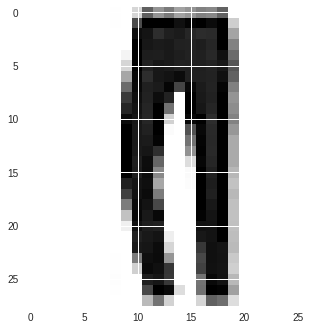

In [0]:
plt.imshow(x_test_o[2].reshape((28,28)))

In [0]:
pred[1]

array([6.0140951e-07, 4.2768210e-15, 9.9999726e-01, 1.4653443e-12,
       3.6472844e-07, 1.5644248e-23, 1.7267494e-06, 3.1363977e-23,
       2.1198802e-14, 1.1301284e-14], dtype=float32)

In [0]:
import numpy as np
print(class_names[np.argmax(pred[1])])
class_names[np.argmax(pred[1])]

Pullover


'Pullover'